In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import ot
import numpy as np
import scipy
import seaborn as sns

/home/grapefroot/datascience3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [114]:
from sklearn.datasets import make_blobs

In [115]:
dat, ass = make_blobs(n_samples=500, n_features=2, centers=2, shuffle=False)

In [116]:
data_0 = dat[ass == 0]
data_1 = dat[ass == 1]

data_full = dat

In [90]:
n_0 = 1500
n_1 = 2000

In [6]:
data_0 = np.random.multivariate_normal([-2, 0], [[0.05, 0.0], [0.0, 100]], size = n_0)
data_1 = np.random.multivariate_normal([2, 0], [[0.05, 0.0], [0.0, 100]], size=n_1)

data_0 = np.concatenate([np.random.uniform(-4, -1, size=(n_0, 1)), np.linspace(-5, 5, num=n_0)[:, np.newaxis]], axis=1)

data_1 = np.concatenate([np.random.uniform(1, 4, size=(n_1, 1)), np.linspace(-5, 5, num=n_1)[:, np.newaxis]], axis=1)

data_full = np.concatenate([data_0, data_1])

In [7]:
# X, y = make_moons(n_samples=10000)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
C = ot.dist(data_0, data_1)

In [109]:
hist_0 = np.ones(data_0.shape[0]) / data_0.shape[0]
hist_1 = np.ones(data_1.shape[0]) / data_1.shape[0]

In [96]:
# hist_0, hist_1 = np.ones(X_test[y_test == 0].shape[0]) / np.sum(y_test == 0), np.ones(X_test[y_test == 1].shape[0]) / np.sum(y_test == 1)

In [117]:
coupling = ot.emd(hist_0, hist_1, C)

In [1007]:
C_1 = ot.dist(np.append(data_0, [(-1, -7)], axis=0), data_1)
coupling_11 = ot.emd(np.ones(data_0.shape[0] + 1) / (data_0.shape[0] + 1) , hist_1, C_1)

In [134]:
coupling1 = ot.sinkhorn(hist_0, hist_1, C / C.max(), reg=0.005, numItermax=100000, log=True, verbose=True)[0]

It.  |Err         
-------------------
    0|2.620207e-01|
   10|1.972455e-06|
   20|1.564153e-10|


In [119]:
from mapper import full_repair, partial_repair, random_repair_original
from utils import balanced_error_rate, disparate_impact, likelihood_ratio

In [135]:
repaired = full_repair(data_0, data_1, coupling)
partially_repaired = partial_repair(0.5, data_0, data_1, coupling)

In [136]:
repaired_ent = full_repair(data_0, data_1, coupling1)
partially_repaired_ent = partial_repair(0.5, data_0, data_1, coupling1)

In [137]:
import networkx
from collections import defaultdict

In [1013]:
def construct_pre_graph(coupling_matrix):
    pre_graph = defaultdict(list)
    for first_hist_index in range(coupling_matrix.shape[0]):
        for second_hist_index in range(coupling_matrix.shape[1]):
            if coupling_matrix[first_hist_index, second_hist_index] > 0:
                pre_graph[first_hist_index].append(coupling_matrix.shape[0] + second_hist_index)
    return pre_graph

In [1014]:
def get_node_color(coupling_matrix, graph):
    return ['yellow' if item < coupling_matrix.shape[0] else '#91c19b' for item in graph.nodes_iter()]

In [1015]:
graph_0 = networkx.from_dict_of_lists(construct_pre_graph(coupling))

In [1016]:
graph_0.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [1017]:
node_color = get_node_color(coupling, graph_0)

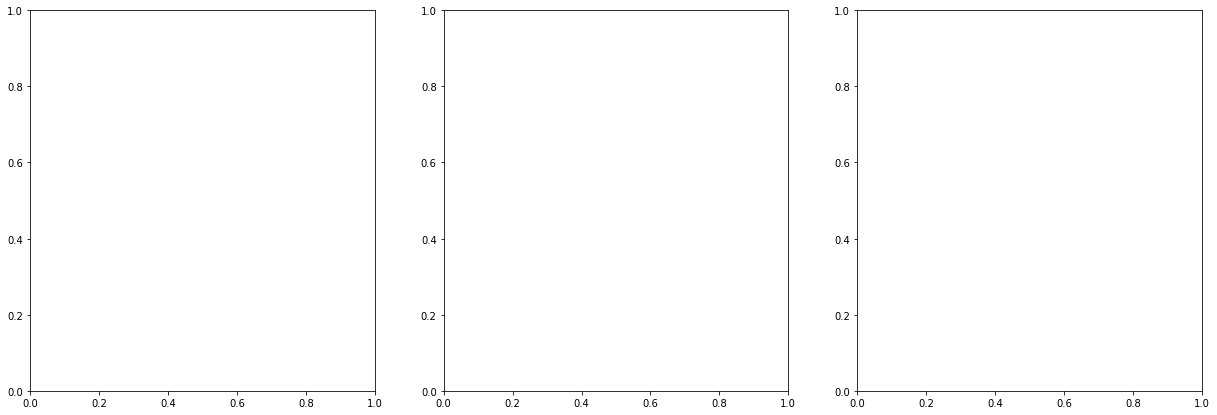

In [1018]:
fig1, (ax_before, ax_newpoint, ax_added) = plt.subplots(1, 3, figsize=(21, 7))

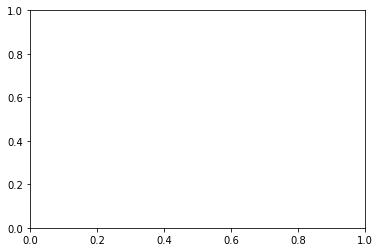

In [1019]:
networkx.draw(graph_0, data_full, linewidths=2, node_color=node_color, with_labels=True, ax=ax_before, node_size=600)
ax_before.collections[0].set_edgecolor('black')

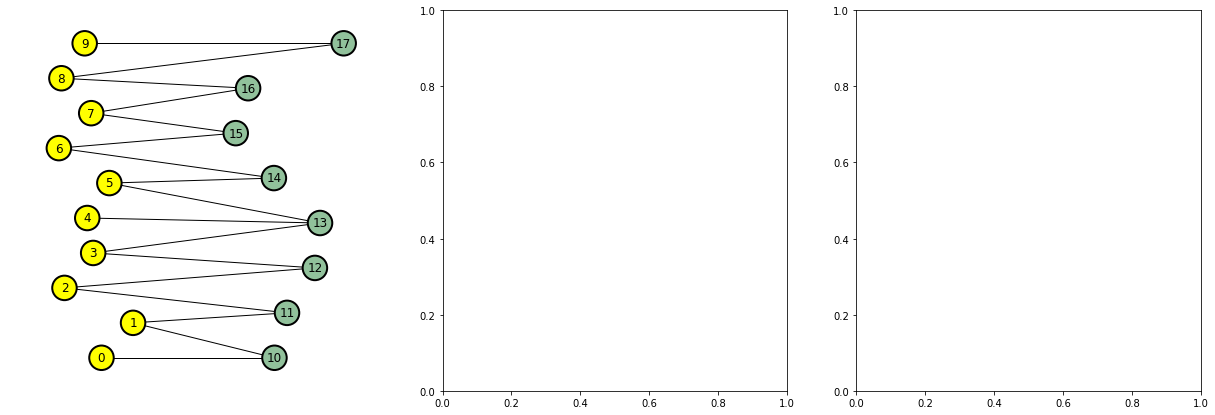

In [1020]:
fig1

In [1021]:
graph_0.add_node(18)
node_color.append('cyan')
data_full = np.append(data_full, values=[(-1, -7)], axis=0)
graph_0.add_edges_from([(18, v) for v in graph_0.nodes() if (v < 18 and v >= coupling.shape[0])])

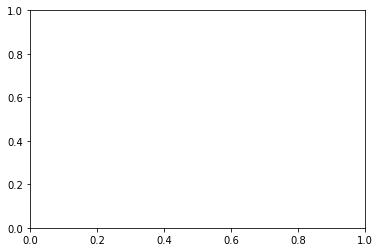

In [1022]:
networkx.draw(graph_0, data_full, linewidths=2, node_color=node_color, with_labels=True, ax=ax_newpoint, node_size=600)
ax_newpoint.collections[0].set_edgecolor('black')

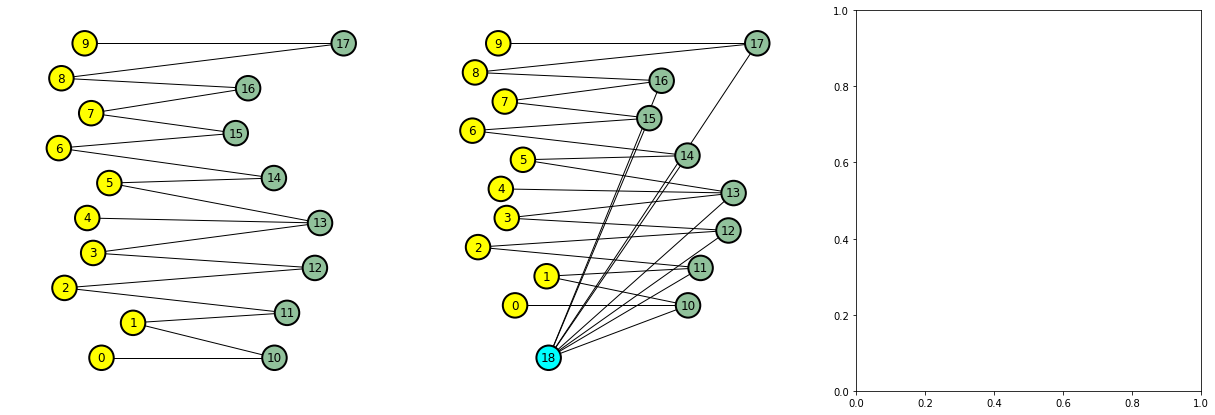

In [1023]:
fig1

In [1025]:
graph_0.remove_edges_from([(18, num + coupling.shape[0]) for (num, val) in enumerate(coupling_11[-1, :]) if val == 0])

In [1024]:
for first_hist_index in range(coupling.shape[0]):
    for second_hist_index in range(coupling.shape[1]):
        if coupling_11[first_hist_index, second_hist_index] > 0 and not graph_0.has_edge(first_hist_index, coupling.shape[0] + second_hist_index):
            graph_0.add_edge(first_hist_index, coupling.shape[0] + second_hist_index)

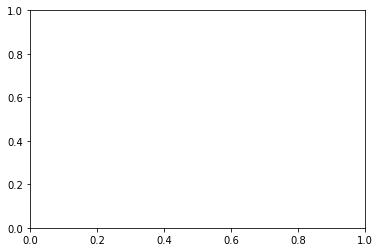

In [1026]:
networkx.draw(graph_0, data_full, linewidths=2, node_color=node_color, with_labels=True, ax=ax_added, node_size=600)
ax_added.collections[0].set_edgecolor('black')

In [881]:
print(plt.style.available)

['dark_background', 'grayscale', 'classic', '_classic_test', 'seaborn', 'seaborn-pastel', 'seaborn-deep', 'seaborn-darkgrid', 'ggplot', 'bmh', 'tableau-colorblind10', 'seaborn-poster', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-colorblind', 'seaborn-bright', 'Solarize_Light2', 'seaborn-dark', 'fast', 'seaborn-white', 'seaborn-paper', 'seaborn-notebook', 'seaborn-muted', 'seaborn-talk', 'seaborn-whitegrid']


In [1027]:
import matplotlib as mpl

In [1028]:
mpl.rc_params()['axes.titlesize']

'large'

In [1029]:
mpl.rc('axes', titlesize='xx-large')

In [1030]:
ax_before.set_title('(a)', y=-0.02)
ax_newpoint.set_title('(b)', y=-0.02)
ax_added.set_title('(c)', y=-0.02)

Text(0.5,-0.02,'(c)')

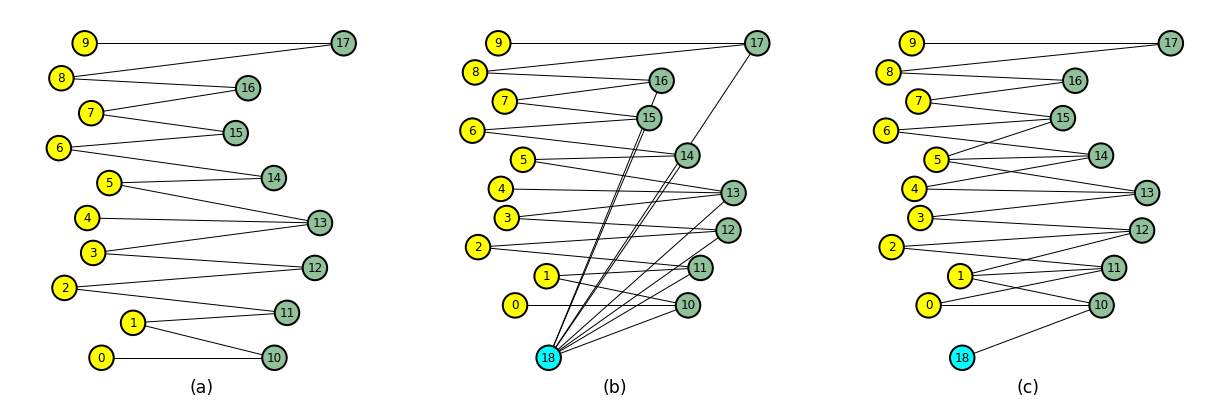

In [1031]:
fig1

In [22]:
import pickle as pl

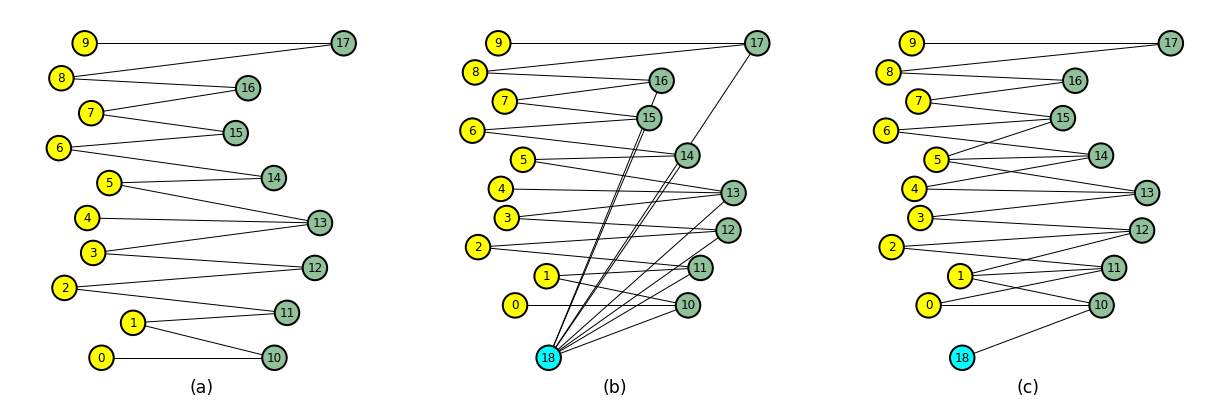

In [1033]:
fig1

In [1034]:
# fig1.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_update.pgf', frameon=True, bbox_inches='tight')

# with open('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_update.pickle', mode='wb') as file:
#     pl.dump(fig1, file)

In [131]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

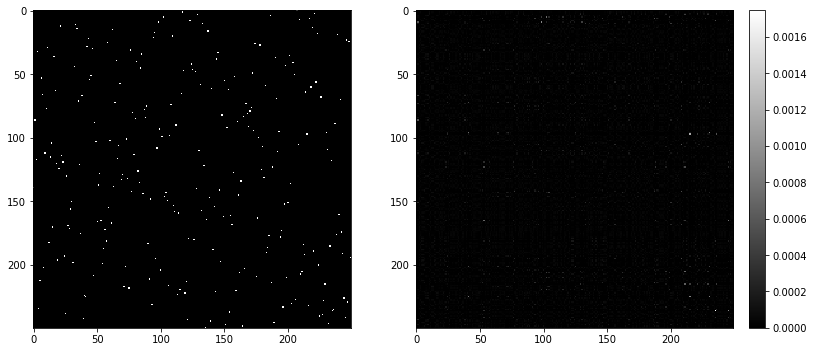

In [132]:
figsize = (14, 6)
fig_coupling, (ax0, ax1, cax) = plt.subplots(nrows=1, ncols=3, figsize=figsize, gridspec_kw = {'width_ratios' : [1, 1, 0.05]})
fig_coupling.subplots_adjust(wspace=0.3)
ax0.imshow(coupling, cmap=plt.cm.gray)
im = ax1.imshow(coupling1, cmap=plt.cm.gray)

ip = InsetPosition(ax1, [1.05, 0, 0.05, 1])
cax.set_axes_locator(ip)
fig_coupling.colorbar(im, ax=[ax0, ax1], cax=cax)
#plt.colorbar(coupling[0])
plt.show()

In [127]:
fig_coupling.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_comparison.png', frameon=True, bbox_inches='tight')
fig_coupling.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_comparison.pgf', frameon=True, bbox_inches='tight')

with open('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_comparison.pickle', mode='wb') as file:
    pl.dump(fig_coupling, file)

In [138]:
colors = np.concatenate((['#90AFC5'] * data_0.shape[0], ['#2A3132'] * data_1.shape[0]))

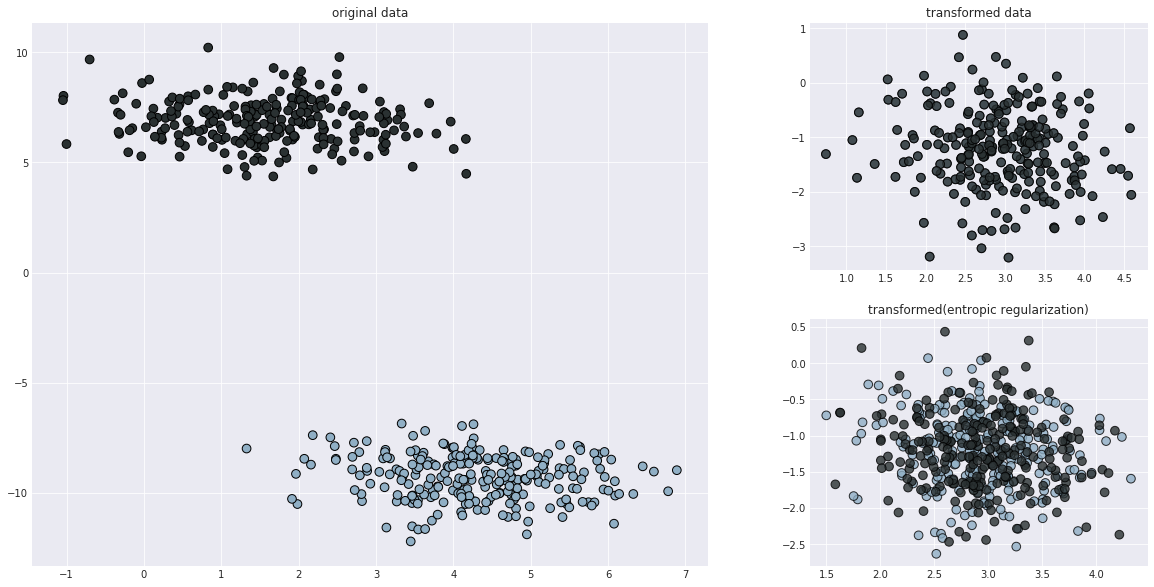

In [139]:
s=75
alpha = 0.8
with sns.axes_style('darkgrid'):
    fig = plt.figure(figsize=(20, 10))

    gs = plt.GridSpec(2, 2, width_ratios=[1, 0.5])

    ax_main = fig.add_subplot(gs[:, 0])
    ax_transformed = fig.add_subplot(gs[0, 1])
    ax_transformed_entropic = fig.add_subplot(gs[1, 1])

    ax_main.scatter(data_full[:, 0], data_full[:, 1], s=s, edgecolor='black', c=colors)
    ax_main.set_title('original data')
    ax_transformed.scatter(repaired[:, 0], repaired[:, 1], s=s, edgecolor='black', c=colors, alpha=alpha)
    ax_transformed.set_title('transformed data')
#    ax[0, 2].scatter(partially_repaired[:, 0], partially_repaired[:, 1], s=200, edgecolor='black')

    ax_transformed_entropic.scatter(repaired_ent[:, 0], repaired_ent[:, 1], s=s, edgecolor='black', c=colors, alpha=alpha)
    ax_transformed_entropic.set_title('transformed(entropic regularization)')
#    ax[1, 2].scatter(partially_repaired_ent[:, 0], partially_repaired_ent[:, 1], s=200, edgecolor='black')

    #plt.savefig('./comparison.png', bbox_inches='tight')

In [124]:
fig.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/synthetic.png', frameon=True, bbox_inches='tight')
fig.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/synthetic.pgf', frameon=True, bbox_inches='tight')


with open('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/synthetic.pickle', mode='wb') as file:
    pl.dump(fig, file)

In [980]:
with sns.axes_style('darkgrid'):
    ax_main.scatter(data_full[:, 0], data_full[:, 1], s=200, edgecolor='black', c=colors, label='original data')
    ax_transformed_entropic.scatter(repaired[:, 0], repaired[:, 1], s=200, edgecolor='black', c=colors, label='')
#    ax[0, 2].scatter(partially_repaired[:, 0], partially_repaired[:, 1], s=200, edgecolor='black')

    ax_transformed_entropic.scatter(repaired_ent[:, 0], repaired_ent[:, 1], s=200, edgecolor='black', c=colors, label='')
#    ax[1, 2].scatter(partially_repaired_ent[:, 0], partially_repaired_ent[:, 1], s=200, edgecolor='black')

    #plt.savefig('./comparison.png', bbox_inches='tight')
    plt.show()

In [ ]:
# fig1.savefig('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_update.pgf', frameon=True, bbox_inches='tight')

# with open('/home/grapefroot/Dropbox/Apps/Overleaf/writeup/img/coupling_update.pickle', mode='wb') as file:
#     pl.dump(fig1, file)